In [89]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [90]:
df = pd.read_csv(r"covid19-russia-cases.csv", sep=',', decimal='.')
df

,Date,Region/City,Region/City-Eng,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered
0,2020-01-26,Diamond Princess,Diamond Princess,NaN,3.0,0.0,0.0,3.0,0.0,0.0
1,2020-01-31,Тюменская область,Tyumen region,72.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2020-01-31,Забайкальский край,Zabaykalsky Krai,75.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2020-02-12,Тюменская область,Tyumen region,72.0,0.0,0.0,1.0,1.0,0.0,1.0
4,2020-02-12,Забайкальский край,Zabaykalsky Krai,75.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5840,2020-06-11,Челябинская область,Chelyabinsk region,74.0,1.0,0.0,132.0,4130.0,37.0,2099.0
5841,2020-06-11,Чеченская Республика,Chechen Republic,95.0,20.0,0.0,46.0,1420.0,16.0,1119.0
5842,2020-06-11,Чукотский автономный округ,Chukotka Autonomous Okrug,87.0,2.0,0.0,1.0,114.0,1.0,70.0
5843,2020-06-11,Ямало-Ненецкий АО,Yamalo-Nenets Autonomous Okrug,89.0,77.0,0.0,3.0,2964.0,13.0,1485.0


In [91]:
df.drop(columns=["Date", "Region/City", "Region/City-Eng", "Region_ID", "Confirmed", "Deaths", "Recovered"], inplace=True)
df

,Day-Confirmed,Day-Deaths,Day-Recovered
0,3.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
5840,1.0,0.0,132.0
5841,20.0,0.0,46.0
5842,2.0,0.0,1.0
5843,77.0,0.0,3.0


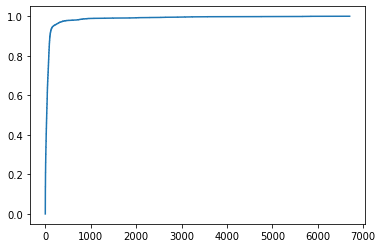

In [92]:
ecdf = ECDF(df["Day-Confirmed"])
plt.step(ecdf.x, ecdf.y);


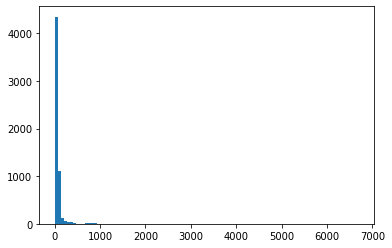

In [93]:
plt.hist(df["Day-Confirmed"], bins=100);

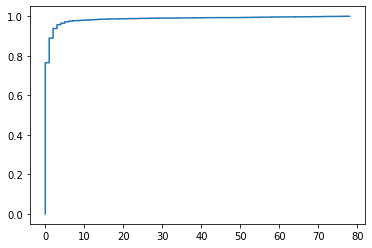

In [94]:
ecdf = ECDF(df["Day-Deaths"])
plt.step(ecdf.x, ecdf.y);

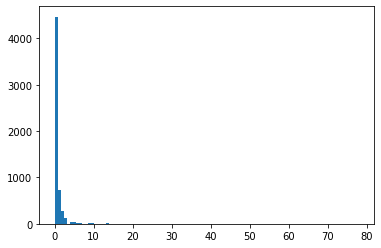

In [95]:
plt.hist(df["Day-Deaths"], bins=100);

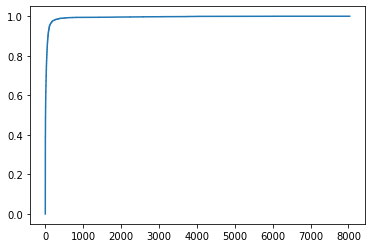

In [96]:
ecdf = ECDF(df["Day-Recovered"])
plt.step(ecdf.x, ecdf.y);

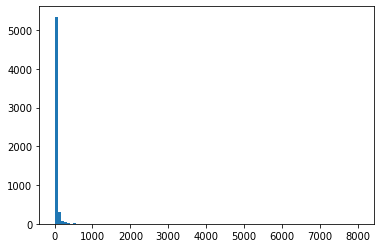

In [97]:
plt.hist(df["Day-Recovered"], bins=100);

Все три графика похоже на Гамма-распределение. 
Справка:
Га́мма-распределе́ние в теории вероятностей — это двухпараметрическое семейство абсолютно непрерывных распределений. Если параметр k принимает целое значение, то такое гамма-распределение также называется распределе́нием Эрла́нга.

Для столбца Day-Confirmed:

In [98]:
np.mean(df["Day-Confirmed"])


85.96047904191617

In [99]:
np.var(df["Day-Confirmed"])


131414.82700952244

In [100]:
df["Day-Confirmed"].skew()


11.426555731157896

In [101]:
df["Day-Confirmed"].kurt()

153.1214617184578

Для столбца Day-Deaths:

In [102]:
np.mean(df["Day-Deaths"])

1.1221556886227544

In [103]:
np.var(df["Day-Deaths"])

35.47181879184318

In [104]:
df["Day-Deaths"].skew()

9.278616933785765

In [105]:
df["Day-Deaths"].kurt()


94.36235566676243

Для столбца Day-Recovered:

In [106]:
np.mean(df["Day-Recovered"])


44.68366124893071

In [107]:
np.var(df["Day-Recovered"])


72538.39180319065

In [108]:
df["Day-Recovered"].skew()


16.56737435000163

In [109]:
df["Day-Recovered"].kurt()

332.81885176323556

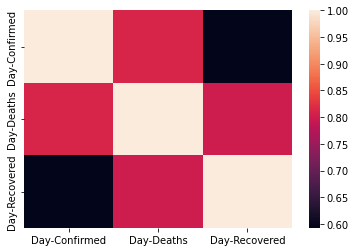

In [110]:
sns.heatmap(df.corr());